# seaborn 빈도그래프 (2)

In [1]:
from matplotlib import pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
from pandas import read_excel
import seaborn as sb
import numpy as np

In [2]:
titanic = read_excel("https://data.hossam.kr/D01/titanic.xlsx", index_col="PassengerId")

df = titanic.astype({"Survived": "category", "Pclass": "category", "Sex": "category", 
                     "Cabin": "category", "Embarked": "category"})

df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
plt.rcParams["font.family"] = 'Malgun Gothic'
#plt.rcParams["font.family"] = 'AppleGothic'
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (7, 4)
plt.rcParams["axes.unicode_minus"] = False

# Countplot
#### 데이터의 빈도를 표현하는 가장 간편한 방법
- catplot() 에서 kind값이 count로 고정되어 있는 형태

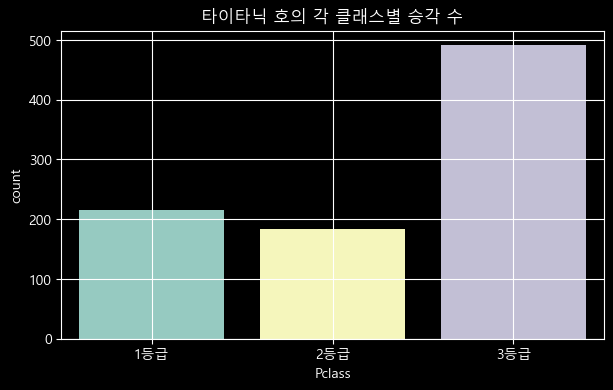

In [5]:
# x축에 설정된 집단별 빈도수 확인
sb.countplot(data=df,x="Pclass")
plt.title('타이타닉 호의 각 클래스별 승각 수')
plt.xticks([0,1,2],['1등급','2등급','3등급']) # barplot에서 x좌표는 무조건 0부터 시작한다.[0,1,2..]로 하는 이유
plt.grid()
plt.show()
plt.close()

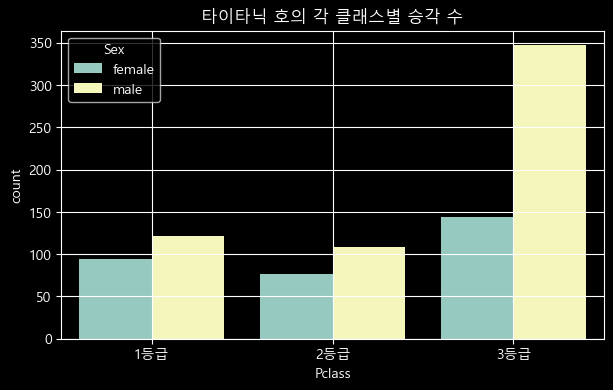

In [6]:
# 범주 추가
sb.countplot(data=df,x="Pclass",hue='Sex')
plt.title('타이타닉 호의 각 클래스별 승각 수')
plt.xticks([0,1,2],['1등급','2등급','3등급'])
plt.grid()
plt.show()
plt.close()

## 모자이크 그래프
- 변량이 모두 범주형인 다차원 데이터를 시각화할때는 모자이크 그래프를 사요하기도한다.
- 모자이크 그래프는 그룹 내 데이터 백분율을 보여주는 누적 막대 그래프다.
- 모자이크 그래프는 변수가 3개 이상일때도 사용할 수 있다. 
- 모자이크 그래프는  statsmodels.graphics.mosaicplot import mosaic 를 사용한다.

1. 한가지 변수에 대한 비율 표시

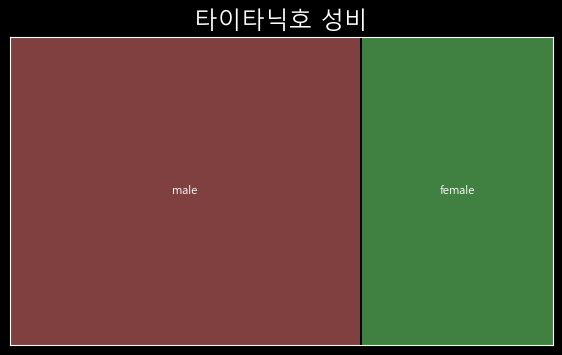

In [9]:
mosaic(df,['Sex'],axes_label=False,) # x축 라벨 표시 하지마라
plt.title('타이타닉호 성비',fontsize=17)
plt.show()
plt.close()

두 개 이상 범주에 대한 비율 표시

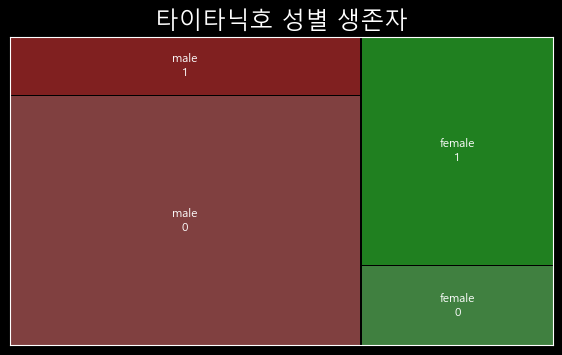

In [10]:
mosaic(df,['Sex','Survived'], axes_label=False)
plt.title('타이타닉호 성별 생존자',fontsize=17)
plt.show()
plt.close()

색상과 표시 라벨 변경하기

In [ ]:
'''람다 설명
def perColor(key) :
    if key == '1' : color ='teal'
        else : color = 'grey'
    return {'color' : color} 
-> 
lambda key : {'color':'teal' if '1' in key else }
getColor 가 칸만큼 반복해서 호출당한다. 반복해서 튜플로 호출당함. <= key / 파라미터로 전달되는 함수를 콜백함수라고 하는데, 이를 간단하게 표현하는게 람다식이다.

산점도를 이용한 그래프(마지막거) - 데이터가 어떻게 분포되어있는지 확인 가능 '''

In [13]:
def getColor(key) :
    if key == '1' : 
        color ='teal'
    else : 
        color = 'grey'
    return {'color' : color} 

('male', '0') -> 남자/사망
('male', '1') -> 남자/생존
('female', '0') -> 여자/사망
('female', '1') -> 여자/생존


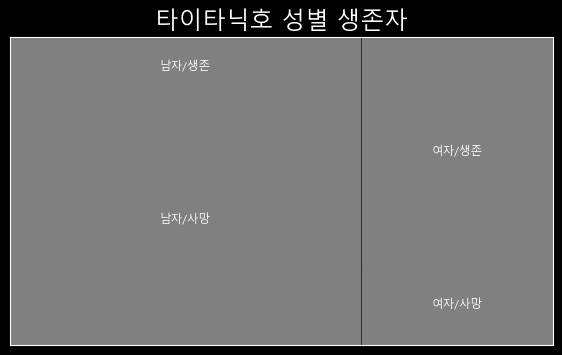

In [14]:
def getLable(key) :
    if "male" in key :
        sex = '남자'
    else :
        sex = "여자"
    if '0' in key :
        sur = '사망'
    else :
        sur = '생존'

    label = "%s/%s" % (sex,sur)
    print(key, "->", label)
    return label

mosaic(df,['Sex','Survived'], axes_label=False,
       properties=getColor, labelizer=getLable)

plt.title('타이타닉호 성별 생존자',fontsize=17)
plt.show()
plt.close()


람다식 사용
- lambda 파라미터 이름 : 리턴 값

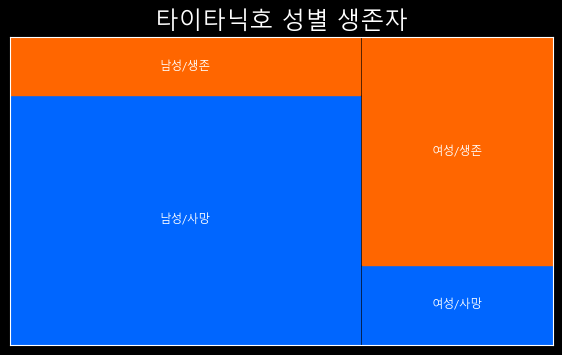

In [15]:
mosaic(df,['Sex','Survived'], axes_label=False,
       properties= lambda key : {'color' : '#ff6600' if '1' in key else '#0066ff'},
       labelizer=lambda key : {('female','1'): '여성/생존',('female','0'): '여성/사망',
                               ('male','1'): '남성/생존',('male','0'): '남성/사망'}[key])
plt.title('타이타닉호 성별 생존자',fontsize=17)
plt.show()
plt.close()

## 집단별 산점도 그래프

In [ ]:
plt.rcParams['font.size'] = 16  # 기본 글자크기 설정
plt.rcParams['figure.figsize'] = (20,10) # 그래프 사이즈 (가로,세로)inch

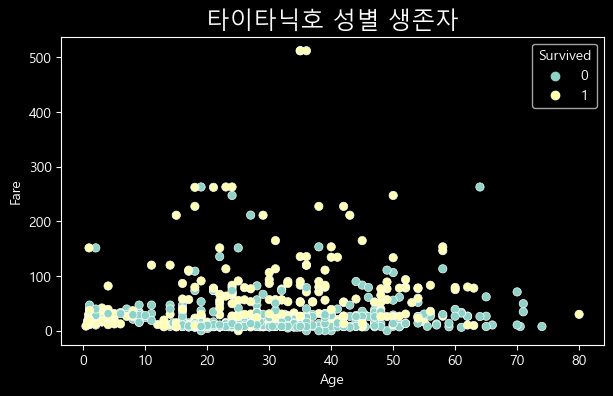

In [16]:
sb.scatterplot(data=df, x='Age',y='Fare', hue='Survived')
plt.title('타이타닉호 성별 생존자',fontsize=17)
plt.show()
plt.close()